# Developing "Momentum" Trading Strategy
* Many differnt takes on this strategy
* Sometimes referred to as trend following
* First need to research potential trading signals

In [1]:
# importing libraries
import numpy as np                          
import pandas as pd
!pip install yfinance
import yfinance as yf
import matplotlib.pyplot as plt

### 1. Download data: 
* Yahoo Finance API
* Typically trading "systems" involve a number of securities
* For this project I am just going to look at GLD --> the gold ETF (an exchange trade fund that tracks the price of gold)

In [2]:
gld = yf.download('GLD')                             # default option gives ~5 years of data
day = np.arange(1, len(gld) + 1)                            # adding day column to the df to keep track of which day we're at
gld['day'] = day
gld.drop(columns=['Adj Close', 'Volume'], inplace = True)   # dropping cols i don't need permanently
gld = gld[['day', 'Open', 'High', 'Low', 'Close']]          # reordering the cols
gld.head()

[*********************100%***********************]  1 of 1 completed


,day,Open,High,Low,Close
Date,,,,,
2004-11-18,1,44.430000,44.490002,44.070000,44.380001
2004-11-19,2,44.490002,44.919998,44.470001,44.779999
2004-11-22,3,44.750000,44.970001,44.740002,44.950001
2004-11-23,4,44.880001,44.919998,44.720001,44.750000
2004-11-24,5,44.930000,45.049999,44.790001,45.049999


In [3]:
gld.info()                                            # basic details of df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4466 entries, 2004-11-18 to 2022-08-16
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     4466 non-null   int64  
 1   Open    4466 non-null   float64
 2   High    4466 non-null   float64
 3   Low     4466 non-null   float64
 4   Close   4466 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 209.3 KB


### 2. Add data/transform data
* calculating signal based on some price or statistical action
* I am going to try a moving average crossover to generate signals
* I go long when the fast one crosses the slow one, I go short when the slow one crosses the fast one
* for this strategy I will always be "in" a trade, either long or short
* Even though it's a low risk strategy, there is always some 'risk' due to market variations in real life

#### Add moving averages to the data frame

In [4]:
gld['9-day'] = gld['Close'].rolling(9).mean()            # Fast moving average, basing it on closing price 
gld['21-day'] = gld['Close'].rolling(21).mean()          # slow moving average, basing it on closing price
gld[19:25]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,day,Open,High,Low,Close,9-day,21-day
Date,,,,,,,
2004-12-16,20,43.990002,44.049999,43.580002,43.680000,44.071111,NaN
2004-12-17,21,43.930000,44.220001,43.779999,44.189999,43.962222,44.594286
2004-12-20,22,44.330002,44.369999,44.130001,44.340000,43.876666,44.592381
2004-12-21,23,44.130001,44.240002,44.049999,44.220001,43.900000,44.565714
2004-12-22,24,44.200001,44.230000,43.889999,44.020000,43.926667,44.521428
2004-12-23,25,44.169998,44.349998,44.049999,44.270000,44.018889,44.498571


#### Add "signal" column  

In [5]:
gld['signal'] = np.where(gld['9-day'] > gld['21-day'], 1, 0)              # looking at where 9-day value> 21-day value
gld['signal'] = np.where(gld['9-day'] < gld['21-day'], -1, gld['signal']) # looking at where 21-day value> 9-day value
gld.dropna(inplace=True)
gld.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

,day,Open,High,Low,Close,9-day,21-day,signal
Date,,,,,,,,
2004-12-17,21,43.930000,44.220001,43.779999,44.189999,43.962222,44.594286,-1
2004-12-20,22,44.330002,44.369999,44.130001,44.340000,43.876666,44.592381,-1
2004-12-21,23,44.130001,44.240002,44.049999,44.220001,43.900000,44.565714,-1
2004-12-22,24,44.200001,44.230000,43.889999,44.020000,43.926667,44.521428,-1
2004-12-23,25,44.169998,44.349998,44.049999,44.270000,44.018889,44.498571,-1


#### Calculate Instantaneous returns/system returns

In [6]:
gld['return'] = np.log(gld['Close']).diff()
gld['system_return'] = gld['signal'] * gld['return']
gld['entry'] = gld.signal.diff()                         # a value to indicate whenever we change directions in a trade
gld.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,day,Open,High,Low,Close,9-day,21-day,signal,return,system_return,entry
Date,,,,,,,,,,,
2004-12-17,21,43.930000,44.220001,43.779999,44.189999,43.962222,44.594286,-1,NaN,NaN,NaN
2004-12-20,22,44.330002,44.369999,44.130001,44.340000,43.876666,44.592381,-1,0.003389,-0.003389,0.0
2004-12-21,23,44.130001,44.240002,44.049999,44.220001,43.900000,44.565714,-1,-0.002710,0.002710,0.0
2004-12-22,24,44.200001,44.230000,43.889999,44.020000,43.926667,44.521428,-1,-0.004533,0.004533,0.0
2004-12-23,25,44.169998,44.349998,44.049999,44.270000,44.018889,44.498571,-1,0.005663,-0.005663,0.0


### Plot trades on time series

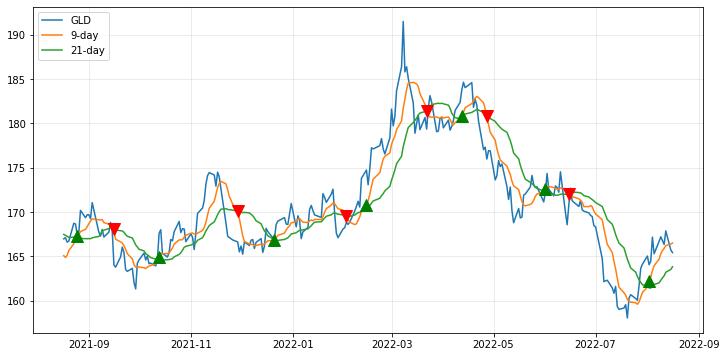

In [7]:
plt.rcParams['figure.figsize'] = 12, 6                  # plotting GLD, 9-day, 21-day figures as line plot
plt.grid(True, alpha = .3)
plt.plot(gld.iloc[-252:]['Close'], label = 'GLD')
plt.plot(gld.iloc[-252:]['9-day'], label = '9-day')
plt.plot(gld.iloc[-252:]['21-day'], label = '21-day')
plt.plot(gld[-252:].loc[gld.entry == 2].index, gld[-252:]['9-day'][gld.entry == 2], '^',
         color = 'g', markersize = 12)
plt.plot(gld[-252:].loc[gld.entry == -2].index, gld[-252:]['21-day'][gld.entry == -2], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2);

### Vizualizing how this system performs over the entire time frame of 5 years vs the buy/hold strategy

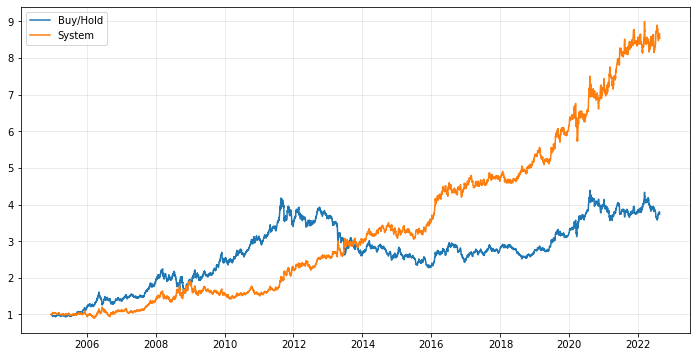

In [8]:
plt.plot(np.exp(gld['return']).cumprod(), label='Buy/Hold')
plt.plot(np.exp(gld['system_return']).cumprod(), label='System')
plt.legend(loc=2)
plt.grid(True, alpha=.3)

In [9]:
np.exp(gld['return']).cumprod()[-1] -1                      # return for just the last-day

2.743380930294142

In [10]:
np.exp(gld['system_return']).cumprod()[-1] -1                # system return for just the last day

7.5400276758474565

## Conclusion: Using the plots and looking at return rates we can decide when to go long or short and when to buy/hold